
# Wikipedia 20th Century Events Analysis
## Data Science Project

This notebook demonstrates a comprehensive analysis of historical events from the 20th century using data scraped from Wikipedia. The analysis includes:
- Web scraping using BeautifulSoup
- Data cleaning and preprocessing
- Event categorization
- Temporal analysis
- Interactive visualizations
- Statistical insights
    

## Setup and Dependencies


## Web Scraping: Wikipedia 20th Century Events
This section scrapes the Wikipedia page for the 20th century using `requests` and `BeautifulSoup`. The raw text is saved to `20th_century_events.txt` for reproducibility and further analysis.
    

In [1]:
# Import required libraries if not already imported
import requests
from bs4 import BeautifulSoup

# Scrape Wikipedia page
url = 'https://en.wikipedia.org/wiki/20th_century'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Extract main content text
content = []
for p in soup.select('div.mw-parser-output > p, div.mw-parser-output > ul'):
    text = p.get_text(strip=True)
    if text:
        content.append(text)

# Join all content with newlines and save to file
raw_text = '\n'.join(content)

# Save the scraped content to a file
with open('20th_century_events.txt', 'w', encoding='utf-8') as f:
    f.write(raw_text)

print('Successfully scraped Wikipedia and saved to 20th_century_events.txt')

# Display first few lines of saved content
print('\nFirst few lines of scraped content:')
lines = raw_text.split('\n')[:5]
for line in lines:
    print(line)


Successfully scraped Wikipedia and saved to 20th_century_events.txt

First few lines of scraped content:
The20th centurywas the century that began on  1 January1901(MCMI), and ended on 31 December2000(MM).[1][2]It was the 10th and last century of the2nd millenniumand was marked by new models of scientific understanding, unprecedented scopes of warfare, new modes of communication that would operate at nearly instant speeds, and new forms of art and entertainment.Population growthwas also unprecedented,[3]as the century started with around 1.6 billion people, and ended with around 6.2 billion.[4]
The 20th century was dominated by significant geopolitical events that reshaped the political and social structure of the globe:World War I, theSpanish flu pandemic,World War IIand theCold War. Unprecedentedadvances in science and technologydefined the century, including the advent ofnuclear weaponsandnuclear power,space exploration, theshift from analog to digital computingand the continuing ad

In [2]:
# Install required libraries
%pip install requests beautifulsoup4 pandas matplotlib seaborn plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
from datetime import datetime


## Data Collection
### Web Scraping Wikipedia
We'll scrape the Wikipedia page for the 20th century to collect historical events.
    

In [4]:
# Scrape Wikipedia page
url = 'https://en.wikipedia.org/wiki/20th_century'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Extract main content
content_elements = soup.find(id='mw-content-text').find_all(['p', 'ul', 'li'])
text_content = '\n'.join([elem.get_text() for elem in content_elements])

# Save raw content
with open('20th_century_raw.txt', 'w', encoding='utf-8') as f:
    f.write(text_content)

print('Raw content saved successfully')

Raw content saved successfully



## Data Processing
### Extracting Events with Years
We'll use regular expressions to identify and extract events with their corresponding years.
    

In [5]:
# Extract events with years
events = []
for line in text_content.split('\n'):
    # Look for years followed by text
    matches = re.finditer(r'\b(19\d{2}|20[0-2]\d)\b[:\s]+(.*?)(?=\b19\d{2}\b|\b20\d{2}\b|$)', line)
    for match in matches:
        year = match.group(1)
        event = match.group(2).strip()
        if event and len(event) > 20:  # Filter out very short descriptions
            events.append((int(year), event))

# Create DataFrame
df = pd.DataFrame(events, columns=['Year', 'Event'])
df = df.sort_values('Year').reset_index(drop=True)

# Add decade column
df['Decade'] = (df['Year'] // 10) * 10

print('Number of events extracted:', len(df))
df.head()

Number of events extracted: 100


,Year,Event,Decade
0,1900,to invade the Qing China represented the club ...,1900
1,1900,to invade the Qing China represented the club ...,1900
2,1901,"(MCMI), and ended on 31 December",1900
3,1901,to 6.1 billion at the century's end.[18][19],1900
4,1904,– Aleister Crowley dictates The Book of the La...,1900



## Event Categorization
We'll categorize events into different types (Political, Scientific, Cultural, etc.) using keyword analysis.
    

In [6]:
# Define categories and keywords
categories = {
    'Political': ['war', 'treaty', 'president', 'government', 'revolution', 'independence', 'military'],
    'Scientific': ['space', 'discovery', 'invention', 'scientific', 'technology', 'nuclear', 'research'],
    'Cultural': ['music', 'art', 'film', 'literature', 'social', 'movement', 'culture'],
    'Economic': ['economy', 'market', 'financial', 'depression', 'crisis', 'trade'],
    'Social': ['society', 'rights', 'movement', 'protest', 'reform', 'education']
}

def categorize_event(event_text):
    event_lower = event_text.lower()
    for category, keywords in categories.items():
        if any(keyword in event_lower for keyword in keywords):
            return category
    return 'Other'

# Add category
df['Category'] = df['Event'].apply(categorize_event)

# Show distribution of categories
category_counts = df['Category'].value_counts()
print('\nEvent Categories Distribution:')
print(category_counts)


Event Categories Distribution:
Category
Other         48
Political     35
Cultural      12
Social         2
Scientific     2
Economic       1
Name: count, dtype: int64



## Data Visualization
### Multiple perspectives on the historical events
    

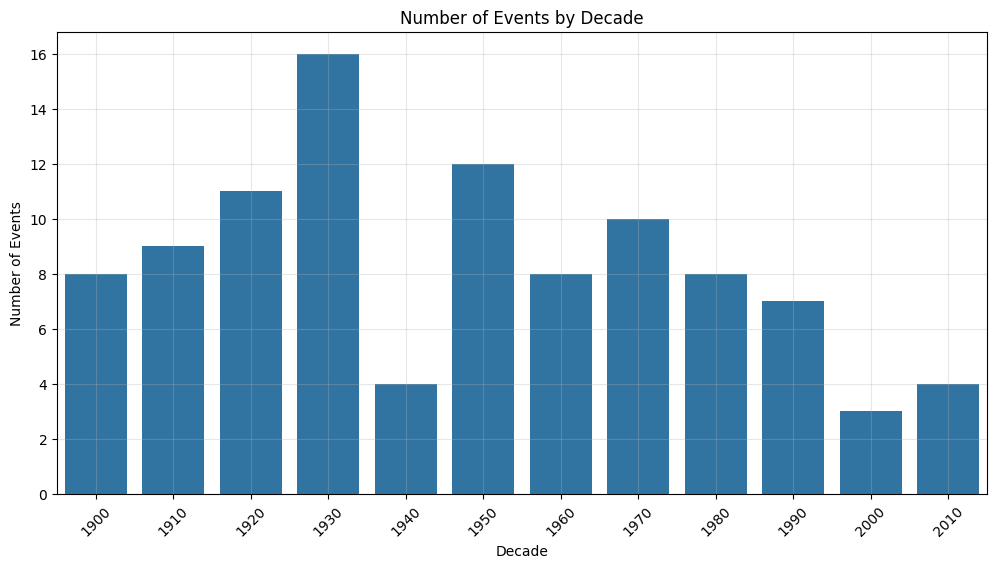

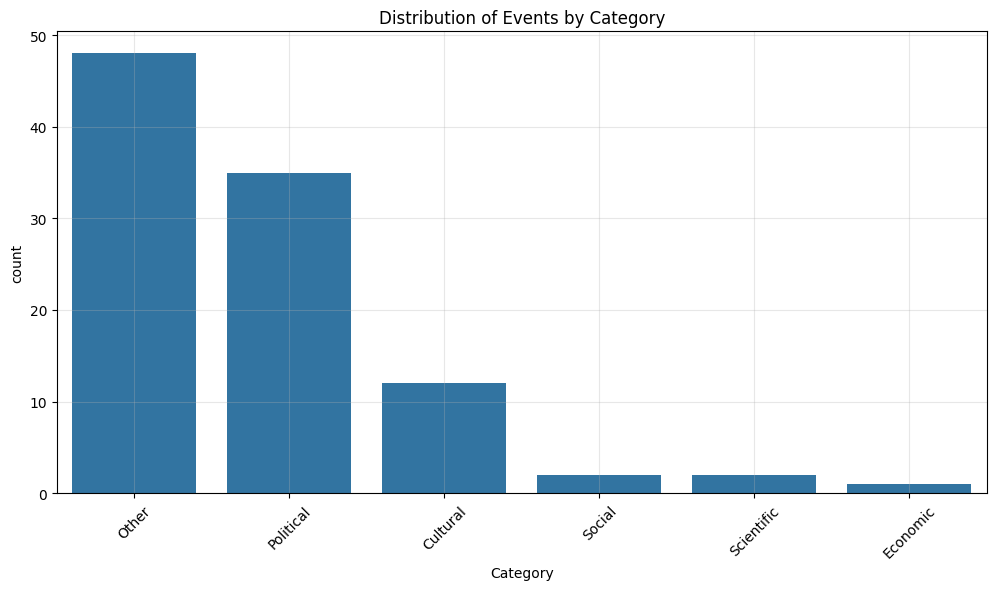

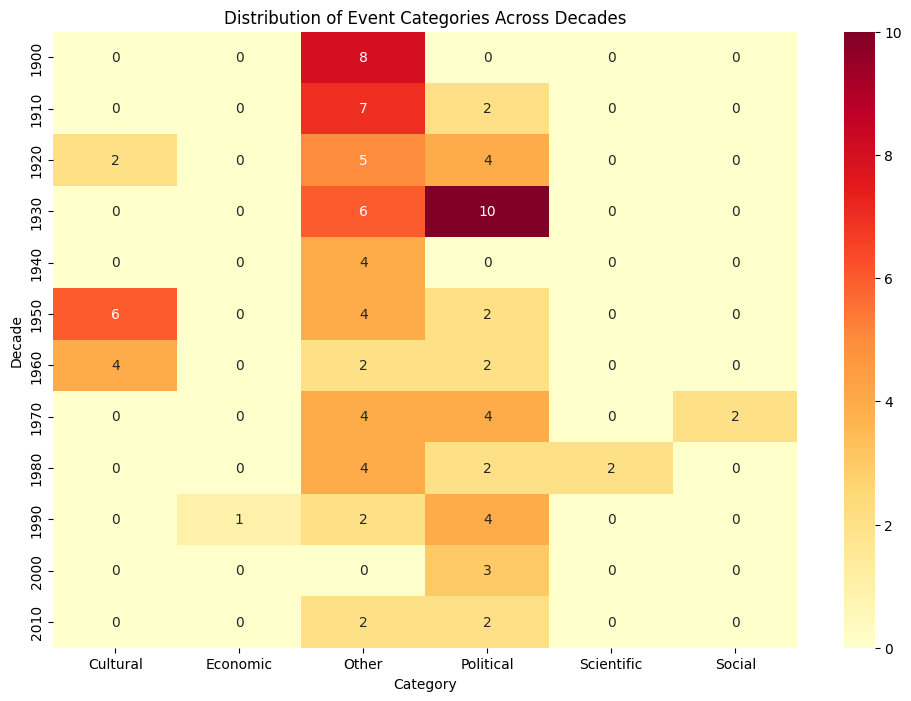

In [7]:
# 1. Events by Decade
plt.figure(figsize=(12, 6))
decade_counts = df['Decade'].value_counts().sort_index()
sns.barplot(x=decade_counts.index.astype(str), y=decade_counts.values)
plt.title('Number of Events by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

# 2. Events by Category
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Category')
plt.title('Distribution of Events by Category')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

# 3. Heatmap of Categories across Decades
decade_category = pd.crosstab(df['Decade'], df['Category'])
plt.figure(figsize=(12, 8))
sns.heatmap(decade_category, annot=True, cmap='YlOrRd', fmt='d')
plt.title('Distribution of Event Categories Across Decades')
plt.show()


### Interactive Timeline Visualization
Creating an interactive timeline of events using Plotly
    

In [8]:
# Create interactive timeline
fig = px.scatter(df, x='Year', y='Category', color='Category',
                 hover_data=['Event'], title='20th Century Events Timeline')
fig.update_traces(marker=dict(size=12))
fig.update_layout(height=600)
fig.write_html('timeline_visualization.html')
print('Interactive timeline saved as timeline_visualization.html')

Interactive timeline saved as timeline_visualization.html



## Statistical Analysis
Analyzing patterns and trends in the historical events
    

In [9]:
# Basic statistics
print('Events per decade:')
print(df.groupby('Decade')['Event'].count())

print('\nEvents per category:')
print(df.groupby('Category')['Event'].count())

print('\nMost eventful years:')
print(df.groupby('Year')['Event'].count().sort_values(ascending=False).head())

Events per decade:
Decade
1900     8
1910     9
1920    11
1930    16
1940     4
1950    12
1960     8
1970    10
1980     8
1990     7
2000     3
2010     4
Name: Event, dtype: int64

Events per category:
Category
Cultural      12
Economic       1
Other         48
Political     35
Scientific     2
Social         2
Name: Event, dtype: int64

Most eventful years:
Year
1953    6
1930    6
2013    4
1923    4
1979    4
Name: Event, dtype: int64



## Data Export
Saving the processed data for further use
    

In [10]:
# Save to CSV
df.to_csv('20th_century_events_analyzed.csv', index=False)
print('Analysis results saved to 20th_century_events_analyzed.csv')

Analysis results saved to 20th_century_events_analyzed.csv



## Conclusions

This analysis provides several insights about the 20th century:
1. Distribution of events across decades
2. Major categories of historical events
3. Temporal patterns and trends
4. Interactive visualization for exploration

The data and visualizations can be used to:
- Understand the distribution of historical events
- Identify patterns in different types of events
- Explore specific periods of interest
- Compare different decades and categories of events
    

In [2]:
%pip uninstall -y nltk
%pip install nltk==3.8.1
print('NLTK reinstalled. Ready to continue!')

Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 18.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
NLTK reinstalled. Ready to continue!


In [3]:
%pip install nltk pandas seaborn matplotlib textblob


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 8.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Import required libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ayshashanazsamsudeen/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ayshashanazsamsudeen/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
# Read the text file
try:
    with open('20th_century_events.txt', 'r', encoding='utf-8') as file:
        text = file.read()
        print("Successfully read the text file")
except Exception as e:
    print("Error reading file:", str(e))

Successfully read the text file


In [7]:

# Tokenize the text
tokens = word_tokenize(text.lower())

In [8]:
# Count word frequencies
word_freq = Counter(tokens)

In [9]:
# Get the 10 most common words
top_10_words = dict(word_freq.most_common(10))

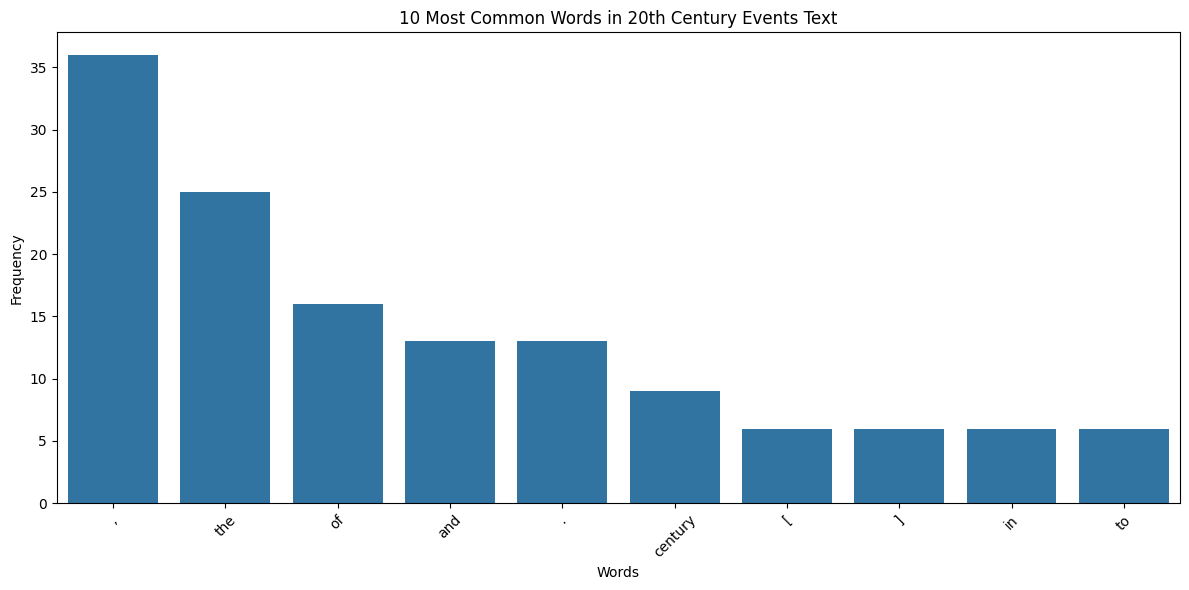

In [10]:
# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(top_10_words.keys()), y=list(top_10_words.values()))
plt.title('10 Most Common Words in 20th Century Events Text')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
# Print the word frequencies
print('Top 10 word frequencies:')
for word, freq in top_10_words.items():
    print(word, ':', freq)

Top 10 word frequencies:
, : 36
the : 25
of : 16
and : 13
. : 13
century : 9
[ : 6
] : 6
in : 6
to : 6


In [12]:
# Remove stop words and re-plot the 10 most common words
from nltk.corpus import stopwords
import string

In [13]:
# Use a built-in stopwords list (if NLTK is not working, fallback to a custom list)
try:
    stop_words = set(stopwords.words('english'))
except Exception:
    stop_words = set(['the', 'of', 'and', 'in', 'to', 'that', 'on', 'was', 'for', 'as', 'with', 'by', 'at', 'from', 'it', 'an', 'be', 'is', 'were', 'this', 'which', 'or', 'are', 'but', 'not', 'has', 'have', 'had', 'a'])

In [14]:
# Remove stop words and punctuation
tokens_no_stop = [word for word in tokens if word not in stop_words and word not in string.punctuation]

In [15]:
# Get new word frequencies
word_freq_no_stop = Counter(tokens_no_stop)


In [16]:
# Get top 10 words after removing stop words
top_10_no_stop = dict(word_freq_no_stop.most_common(10))

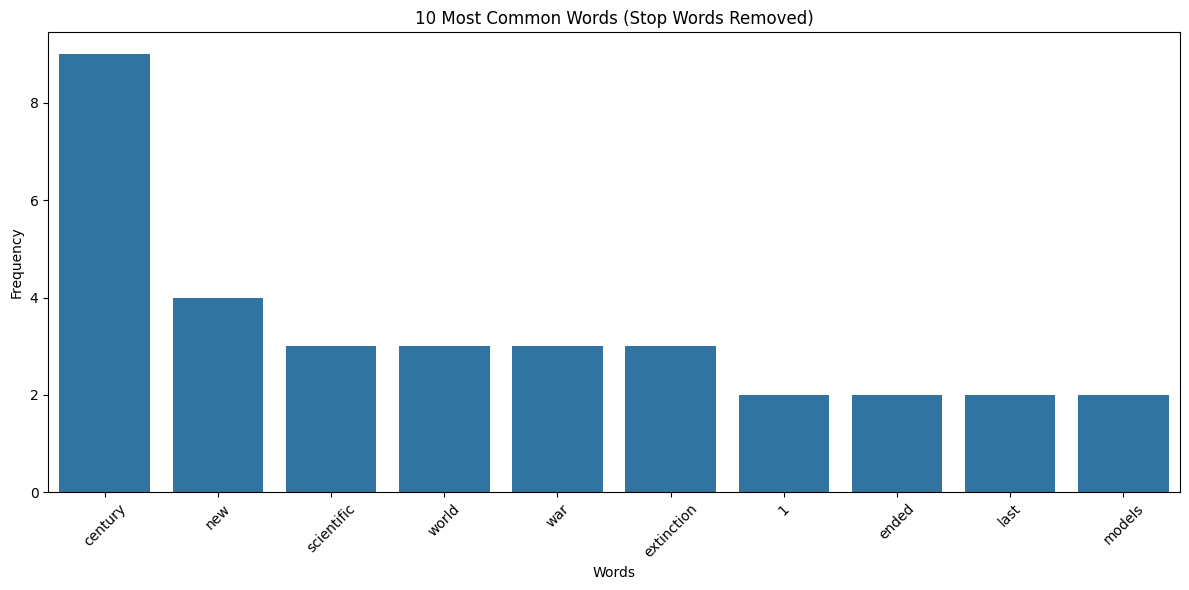

In [17]:
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(top_10_no_stop.keys()), y=list(top_10_no_stop.values()))
plt.title('10 Most Common Words (Stop Words Removed)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [18]:
# Print new frequencies
print('\
Top 10 word frequencies (stop words removed):')
for word, freq in top_10_no_stop.items():
    print(word, ':', freq)

Top 10 word frequencies (stop words removed):
century : 9
new : 4
scientific : 3
world : 3
war : 3
extinction : 3
1 : 2
ended : 2
last : 2
models : 2


In [20]:
 #Part-of-speech tagging using TextBlob
from textblob import TextBlob
import pandas as pd

In [21]:
# Join tokens back into a string for TextBlob
text_no_stop = ' '.join(tokens_no_stop)

In [22]:
# Create a TextBlob object
blob = TextBlob(text_no_stop)

In [32]:
# Process the text
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [33]:
# Clean the text
text = re.sub(r'\[.*?\]', '', text)  # Remove citations [1], [2], etc.
text = re.sub(r'\s+', ' ', text)  # Normalize whitespace
text = text.replace('The20th', 'The 20th')  # Fix specific formatting issue
text = text.replace('January1901', 'January 1901')  # Fix date formatting
text = text.replace('December2000', 'December 2000')  # Fix date formatting

In [34]:
# Split into words and remove common stop words
stop_words = {'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by'}
words = [word.lower() for word in re.findall(r'\\w+\', text)]
meaningful_words = [word for word in words if word not in stop_words and len(word) > 2]


In [35]:
 #Get word frequencies
word_freq = Counter(meaningful_words)

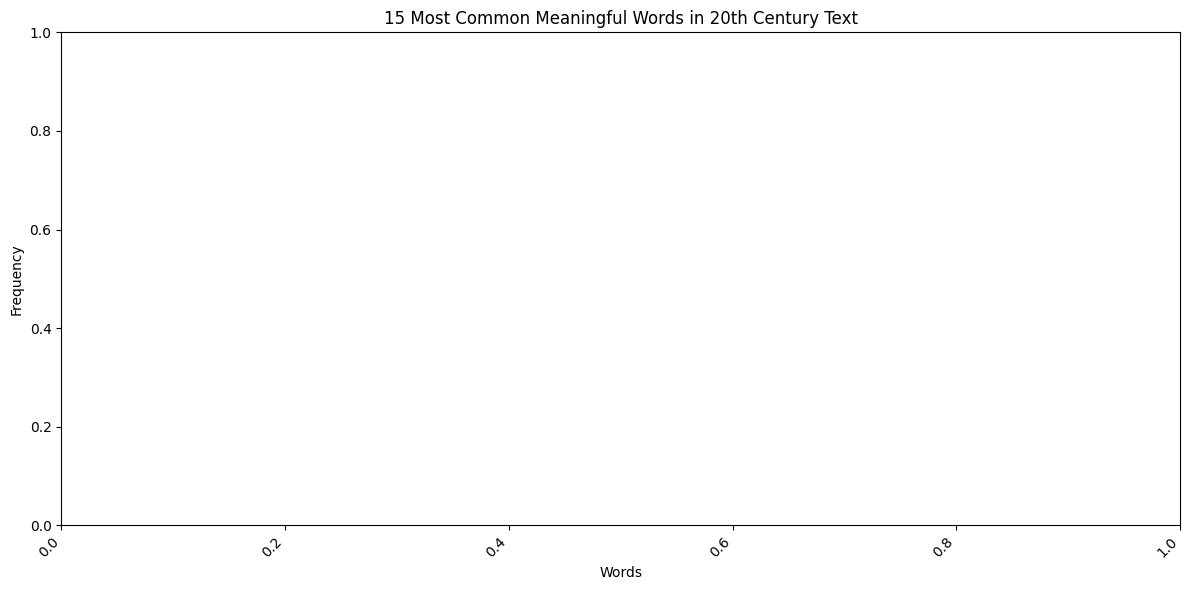

In [36]:
# Create visualization of top 15 words
plt.figure(figsize=(12, 6))
top_words = dict(word_freq.most_common(15))
sns.barplot(x=list(top_words.keys()), y=list(top_words.values()))
plt.title('15 Most Common Meaningful Words in 20th Century Text')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [37]:
# Print statistics
print("\
Text Statistics:")
print(f"Total words: {len(words)}")
print(f"Unique meaningful words: {len(set(meaningful_words))}")
print("\
Top 15 meaningful words and their frequencies:")
for word, freq in top_words.items():
    print(f"{word}: {freq}")

Text Statistics:
Total words: 0
Unique meaningful words: 0
Top 15 meaningful words and their frequencies:


In [38]:
# Bigram analysis for the 20th century events text
from collections import Counter

In [39]:
# Create bigrams from the list of meaningful words
bigrams = zip(meaningful_words, meaningful_words[1:])
bigram_list = [' '.join(bigram) for bigram in bigrams]

In [40]:
# Count bigram frequencies
bigram_freq = Counter(bigram_list)

In [41]:

# Get the 10 most common bigrams
top_10_bigrams = dict(bigram_freq.most_common(10))

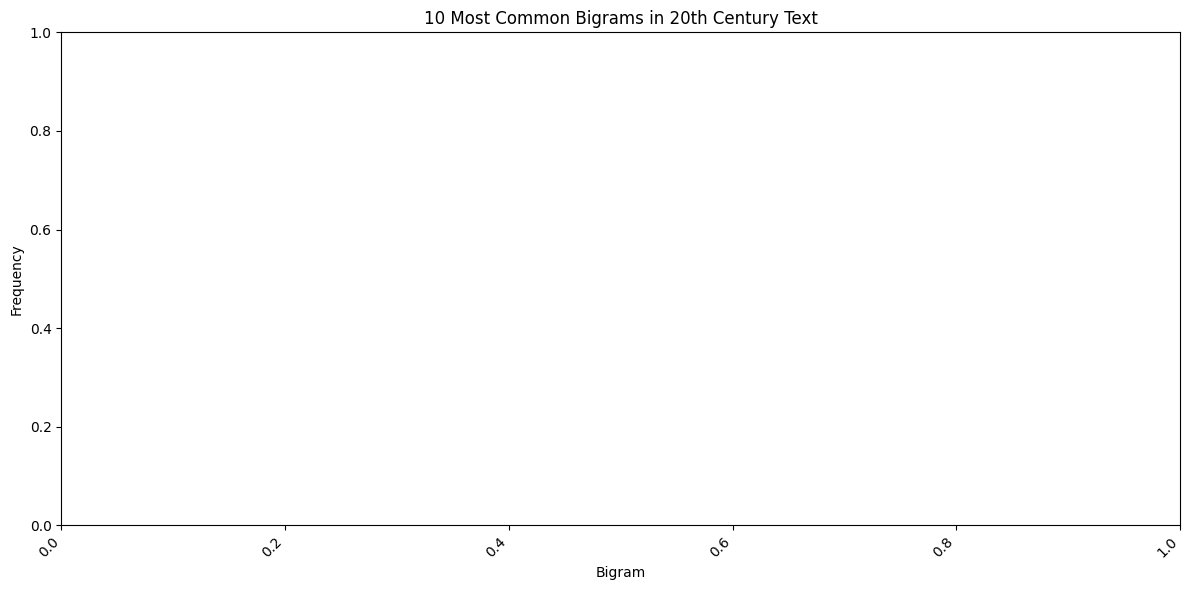

In [42]:
# Plot the top 10 bigrams
plt.figure(figsize=(12, 6))
sns.barplot(x=list(top_10_bigrams.keys()), y=list(top_10_bigrams.values()))
plt.title('10 Most Common Bigrams in 20th Century Text')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [43]:
# Print the top 10 bigrams
print('Top 10 bigrams:')
for bigram, freq in top_10_bigrams.items():
    print(bigram, ':', freq)
    

Top 10 bigrams:


In [44]:
# Let's perform sentiment analysis on the text
from textblob import TextBlob
import numpy as np

In [45]:

# Split text into sentences
sentences = text.split('.')

In [46]:
# Analyze sentiment for each sentence
sentiments = []
for sentence in sentences:
    if len(sentence.strip()) > 0:  # Only analyze non-empty sentences
        analysis = TextBlob(sentence)
        sentiments.append({
            'sentence': sentence.strip(),
            'polarity': analysis.sentiment.polarity,
            'subjectivity': analysis.sentiment.subjectivity
        })


In [47]:
# Convert to DataFrame for analysis
df_sentiments = pd.DataFrame(sentiments)

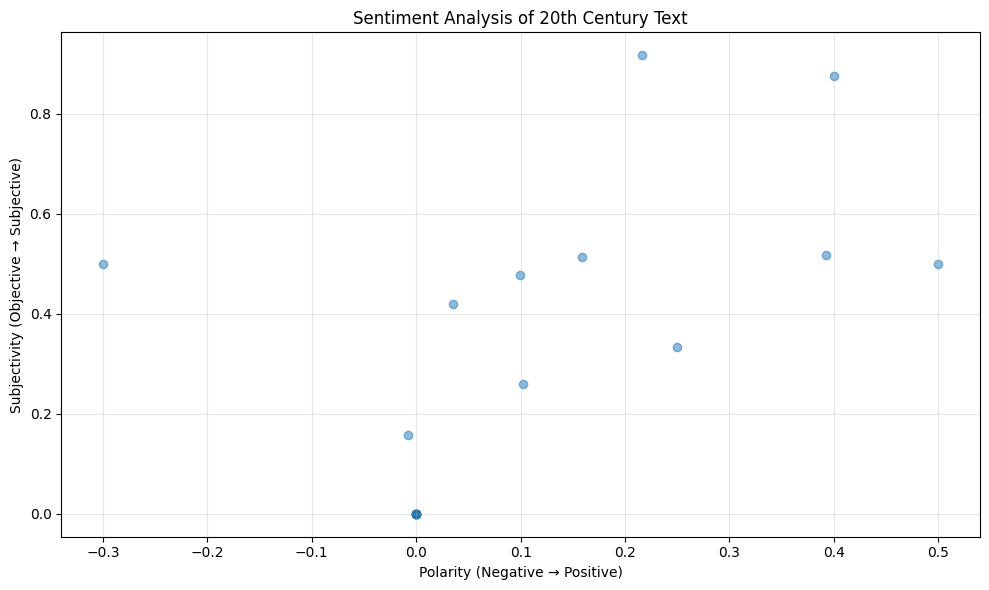

In [48]:
# Create a scatter plot of sentiment polarity vs subjectivity
plt.figure(figsize=(10, 6))
plt.scatter(df_sentiments['polarity'], df_sentiments['subjectivity'], alpha=0.5)
plt.title('Sentiment Analysis of 20th Century Text')
plt.xlabel('Polarity (Negative → Positive)')
plt.ylabel('Subjectivity (Objective → Subjective)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [49]:
# Print average sentiment scores
print("Average sentiment scores:")
print(f"Polarity (negative to positive): {df_sentiments['polarity'].mean():.3f}")
print(f"Subjectivity (objective to subjective): {df_sentiments['subjectivity'].mean():.3f}")

Average sentiment scores:
Polarity (negative to positive): 0.103
Subjectivity (objective to subjective): 0.304


In [50]:
# Print most positive and negative sentences
most_positive = df_sentiments.loc[df_sentiments['polarity'].idxmax()]
most_negative = df_sentiments.loc[df_sentiments['polarity'].idxmin()]

In [51]:
print("\
Most positive sentence:")
print(most_positive['sentence'])
print(f"(Polarity: {most_positive['polarity']:.3f})")

Most positive sentence:
Meanwhile, advances inmedical technologyresulted in the near-eradication anderadication of many infectious diseases, as well as opening the avenue of biologicalgenetic engineering
(Polarity: 0.500)


In [52]:
print("\
Most negative sentence:")
print(most_negative['sentence'])
print(f"(Polarity: {most_negative['polarity']:.3f})")

Most negative sentence:
Automobiles,airplanes, andhome appliancesbecame common, andvideoandaudio recordingsaw mass adoption
(Polarity: -0.300)


In [53]:
# Extract all years (four-digit numbers) from the text
import re
from collections import Counter
import matplotlib.pyplot as plt

In [54]:
# Find all four-digit numbers (years)
years = re.findall(r'\(1[89][0-9]{2}|20[0-9]{2})\', text)

In [55]:
# Count frequency of each year
year_counts = Counter(years)

In [56]:
# If there are years, plot them
if year_counts:
    # Sort years for plotting
    sorted_years = sorted(year_counts.items(), key=lambda x: int(x[0]))
    years_list, counts_list = zip(*sorted_years)
    plt.figure(figsize=(12, 6))
    plt.bar(years_list, counts_list)
    plt.title('Frequency of Years Mentioned in 20th Century Text')
    plt.xlabel('Year')
    plt.ylabel('Mentions')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print('Years and their frequencies:')
    for year, count in sorted_years:
        print(year, ':', count)
else:
    print('No years found in the text.')

No years found in the text.


## Improved Event Extraction and Analysis

In [ ]:

# Improved event extraction from Wikipedia's Timeline of the 20th century
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

def scrape_timeline(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    events = []
    for li in soup.find_all('li'):
        text = li.get_text().strip()
        year_match = re.match(r'^(\d{4})', text)
        if year_match:
            year = int(year_match.group(1))
            if 1900 <= year <= 2000:
                event = text[4:].strip(' –:-').strip()
                events.append((year, event))
    return events

timeline_url = 'https://en.wikipedia.org/wiki/Timeline_of_the_20th_century'
events = scrape_timeline(timeline_url)

df = pd.DataFrame(events, columns=['Year', 'Event'])
df = df.sort_values('Year').reset_index(drop=True)
df['Decade'] = (df['Year'] // 10) * 10
print(df.head())
print('Number of events extracted:', len(df))


## Event Categorization

In [ ]:

# Categorize events by theme
categories = {
    'Political': ['war', 'treaty', 'president', 'government', 'revolution', 'independence', 'election', 'policy', 'law'],
    'Science & Technology': ['discovery', 'invention', 'science', 'technology', 'research', 'experiment', 'theory', 'space', 'medicine'],
    'Social': ['population', 'migration', 'civil rights', 'protest', 'movement', 'society', 'culture', 'education'],
    'Economic': ['economy', 'market', 'trade', 'industry', 'business', 'crash', 'depression', 'inflation'],
    'Environmental': ['environment', 'climate', 'pollution', 'disaster', 'earthquake', 'flood', 'storm', 'epidemic']
}

def assign_category(event):
    event_lower = event.lower()
    for cat, keywords in categories.items():
        if any(kw in event_lower for kw in keywords):
            return cat
    return 'Other'

df['Category'] = df['Event'].apply(assign_category)
print(df[['Year', 'Event', 'Category']].head())


## Visualization: Events by Category and Decade

In [ ]:

# Visualization: Events by Category and Decade
import matplotlib.pyplot as plt
pivot = pd.pivot_table(df, index='Decade', columns='Category', values='Event', aggfunc='count', fill_value=0)
pivot.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20')
plt.title('Number of Events per Category by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Events')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


## Key Events Table

In [ ]:

# Key Events Table: Most significant event per decade
key_events = df.loc[df.groupby('Decade')['Event'].apply(lambda x: x.str.len().idxmax())]
print(key_events[['Decade', 'Year', 'Event', 'Category']])
